In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
p = list(data1.columns[:2])
p.append(data1.columns[-1])
data1[p].head()
#https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0


In [3]:
data1;

In [4]:
def Mean(query_data):
    return np.mean(query_data)
def Varience(query_data):
    return np.var(query_data)

m  = Mean(data1["sepal length (cm)"])

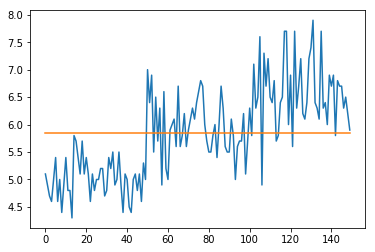

In [5]:
%matplotlib inline
plt.plot(np.arange(len(data1)),data1["sepal length (cm)"])
plt.plot(np.arange(len(data1)),np.full(len(data1),m))

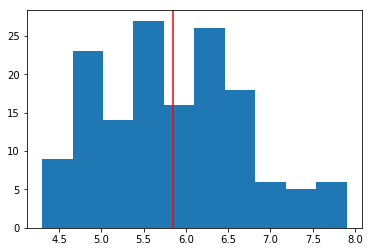

In [6]:
plt.hist(data1["sepal length (cm)"])
plt.axvline(x=m,color='r')

In [7]:
v = np.var(data1["sepal length (cm)"])

In [8]:
v

0.6811222222222222

In [9]:
from sklearn.utils import shuffle
data1 = shuffle(data1[["sepal length (cm)","petal width (cm)","target"]])

In [10]:
p = data1.groupby(["target"]).mean()

In [11]:
for i in range(len(p)):
    p.iloc[i]  = p.iloc[i]/p.iloc[i].sum()

In [12]:
p=data1.groupby(["target"]).var()
#p.iloc[0].sum()
p.sum()
p.index.tolist()

[0.0, 1.0, 2.0]

In [13]:
class probDistr:
    def Mean(query_data):
        return np.mean(query_data)

    def Varience(query_data):
        return np.var(query_data)

    def probDist(x,mean_ifeatur,varience_ifeatur):
        num = np.exp((np.negative(x-mean_ifeatur))/(2*varience_ifeatur))
        den = np.sqrt(2*np.pi*varience_ifeatur**2)
        return num/den

In [14]:
# p(class = 1| feature1 = someting, featur2 = something)
# = (p(feature1=something | class = 1)*p(feature2=something | class = 1)*p(class = 1))/\
#                                 p(feature1 = something)*p(feature2 = somehthing)
class GaussianNaiveBayes(probDistr):
    def __init__(self,datfrm):
        self.datafrm = datfrm
        super().__init__(self)
        self.df_mean= self.mean_classWise(self.datfrm)
        self.df_var = self.var_classWise(self.datfrm)
        self.classes = self.df_mean.index.tolist()
    
    def var_classWise(self):
        return datafrm.groupby([self.datafrm.column[-1]]).var()
        
    def mean_classWise(self):
        return datafrm.groupby([self.datafrm.column[-1]]).mean()
    
    def class_prob(self,clas):  #P(A=class)
        sum_classes = self.prob_df.sum().sum()
        return self.prob_df.sum()[clas]/sum_classes
    
    def pob_featur_product(self,x):
        fet_prod = 1
        for i in self.prob_df.column:
            #mean and varience of 
            mean_i,varience_i = mean(self.datafrm[i]),varience(self.datafrm[i])
            fet_prod *= self.probDist(x,mean_i,variaence_i)
        
    def given_instance_prob(self,x):
        #return P(x|k1_class)+P(x|k2_class)+P(x|k3_class)+...
        #P(x|k1_class) = P(k1_class|x)*P(k_class)
        sum_ = 0
        for i in self.classes:
            mean_i,varience_i = mean(self.datafrm[i]),varience(self.datafrm[i])            
            sum_ += self.probDist(x,mean_i,variaence_i)
        return sum_
    
    def get_probX_given_class_k(self,x,k):                  #P(B=feature)
        #num = #P(A=class_k)*P(featur1|class_k)*P(featur2|class_k)*...
        #return P(k_class|x_testInstance)
        num = self.class_prob(k)*pob_featur_product(x)
        den = self.given_instance_prob(x)
        return num/den
    def predict_class(self,x):
        class_score=[]
        for i in self.classes:
            class_score.append(self.get_probX_given_class_k(x,i))
        return np.argmaxa(class_score)
    

In [67]:
x_train = data1[data1.columns[:-1]]
y_train = data1[[data1.columns[-1]]]
df = x_train.join(y_train)
df.groupby([df.columns[-1]]).mean()["sepal length (cm)"]

target
0.0    5.006
1.0    5.936
2.0    6.588
Name: sepal length (cm), dtype: float64

In [51]:
y_train["target"].value_counts(normalize=True).tolist()


[0.3333333333333333, 0.3333333333333333, 0.3333333333333333]